In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
import csv
# from playML.LDA import LDA
from playML.metrics import plot_decision_boundary
from playML.Bayers import BayersGN
X_train, y_train = np.loadtxt("X.csv", delimiter=","),np.loadtxt("y.csv", delimiter=",")
X_test, y_test =  np.loadtxt("X_test.csv", delimiter=","), np.loadtxt("y_test.csv", delimiter=",")

accuracy
[0.813953488372093, 0.8604651162790697, 0.8837209302325582, 0.8604651162790697]
('priors = [0.1, 0.9]', 'priors=[0.25,0.75]', 'priors=[0.5,0.5]', 'priors=[0.75,0.25]')
accuracy
[0.9534883720930233, 0.9767441860465116, 0.9534883720930233, 0.9302325581395349]
('priors = [0.1, 0.9]', 'priors=[0.25,0.75]', 'priors=[0.5,0.5]', 'priors=[0.75,0.25]')
accuracy
[0.9534883720930233, 0.9534883720930233, 0.9534883720930233, 0.8837209302325582]
('priors = [0.1, 0.9]', 'priors=[0.25,0.75]', 'priors=[0.5,0.5]', 'priors=[0.75,0.25]')


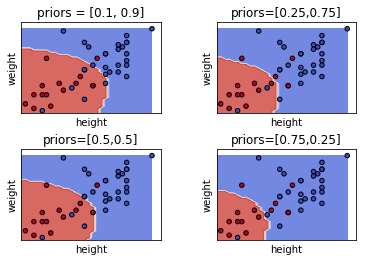

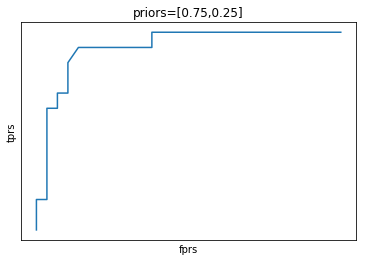

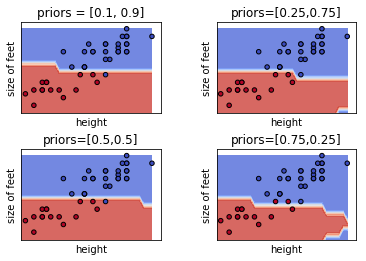

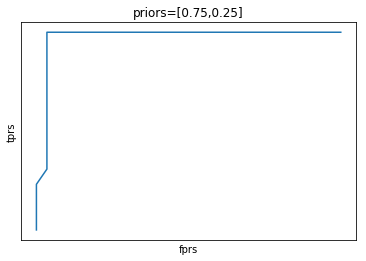

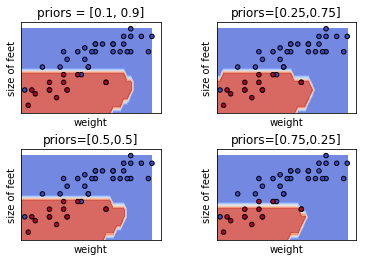

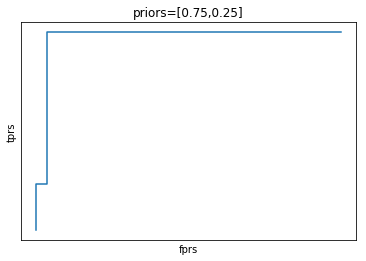

In [20]:
bayers_2d(0,1)
bayers_2d(0,2)
bayers_2d(1,2)

In [19]:
def bayers_2d(i, j): 
    from playML.Bayers import BayersGN
    models = (BayersGN(priors = [0.1, 0.9]),
               BayersGN(priors=[0.5,0.5]),
               BayersGN(priors=[0.25,0.75]),
               BayersGN(priors=[0.75,0.25])) 
    X_2d, X_test_2d = np.vstack((X[:,i],X[:,j])).T, np.vstack((X_test[:,i],X_test[:,j])).T
    models = [clf.fit(X_2d, Y) for clf in models]
    # scores
    scores = [model.score(X_test_2d, y_test) for model in models]
    print("accuracy")
    print(scores)

    # title for the plots
    titles = ('priors = [0.1, 0.9]',
              'priors=[0.25,0.75]',
              'priors=[0.5,0.5]',
              'priors=[0.75,0.25]')
    labels = ("height","weight","size of feet") 
    print(titles)
    fig, sub = plt.subplots(2, 2)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    from playML.metrics import plot_decision_boundary
    for clf, title, ax in zip(models, titles, sub.flatten()):
        plot_decision_boundary(ax, clf, X_test_2d, h=1)
        ax.scatter(X_test_2d[:,0], X_test_2d[:,1], c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k')  
        ax.set_xlabel(labels[i])
        ax.set_ylabel(labels[j])
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)
    
    
    fig, sub = plt.subplots(1, 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    from playML.metrics import roc
    from sklearn.metrics import roc_curve
    fprs = []
    tprs = []
    decision_scores = clf.decision_function(X_test_2d)
#     fprs, tprs,_  = roc(decision_scores, y_test)
    fprs, tprs,_  = roc_curve(y_test,decision_scores )
    sub.plot(fprs, tprs)
    sub.set_xlabel("fprs")
    sub.set_ylabel("tprs")
    sub.set_xticks(())
    sub.set_yticks(())
    sub.set_title(title)

In [22]:
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm 
from matplotlib.ticker import LinearLocator, FormatStrFormatter 
clf = BayersGN(priors=[0.25,0.75])
clf.fit(X_train[y_train==1,:2], y_train[y_train==1])

In [11]:
X_train[y_train==1].shape

(77, 3)

In [15]:
mu_vec = clf._mean[0]
cov_mat = clf._cov[0]
x_2Dgauss = X_train[y_train==1,:2]

In [17]:
def pdf_multivaraible_gauss(x, mu, cov): 
    part1 = 1 / ((2 * np.pi) ** (len(mu)/2) * (np.linalg.det(cov)**(1/2))) 
    part2 = (-1/2) * (x-mu).T.dot(np.linalg.inv(cov)).dot((x-mu))
    return float(part1 * np.exp(part2))

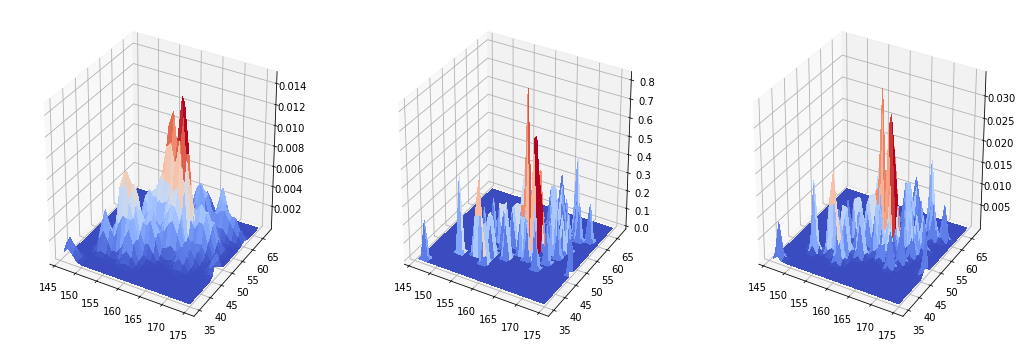

In [58]:
from playML.parzen import parzen_estimation
pg1 = parzen_estimation(x_2Dgauss, 1, mode='gauss')
pg2 = parzen_estimation(x_2Dgauss, 0.1, mode='gauss')
pg3 = parzen_estimation(x_2Dgauss, 0.5, mode='gauss')

from playML.utils import make_meshgrid
x, y = make_meshgrid(X_train[y_train==1, 0], X_train[y_train==1, 1], h=1)

zg = [] 
zh = [] 
zt = [] 
for i, j in zip(x.ravel(), y.ravel()): 
    zg.append(pg1([[i, j]])) 
    zh.append(pg2([[i, j]])) 
    zt.append(pg3([[i, j]]))

zg = np.asarray(zg).reshape(x.shape)
zh = np.asarray(zh).reshape(x.shape)
zt = np.asarray(zt).reshape(x.shape)

fig = plt.figure(figsize=(18, 6)) 
ax1 = fig.add_subplot(131, projection='3d') 
surf = ax1.plot_surface(x, y, zg, rstride=1, cstride=1, cmap=cm.coolwarm, antialiased=False)
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(x, y, zh, rstride=1, cstride=1, cmap=cm.coolwarm, antialiased=False)
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_surface(x, y, zt, rstride=1, cstride=1, cmap=cm.coolwarm, antialiased=False)

Text(0.5,0.92,'win_width = 4')

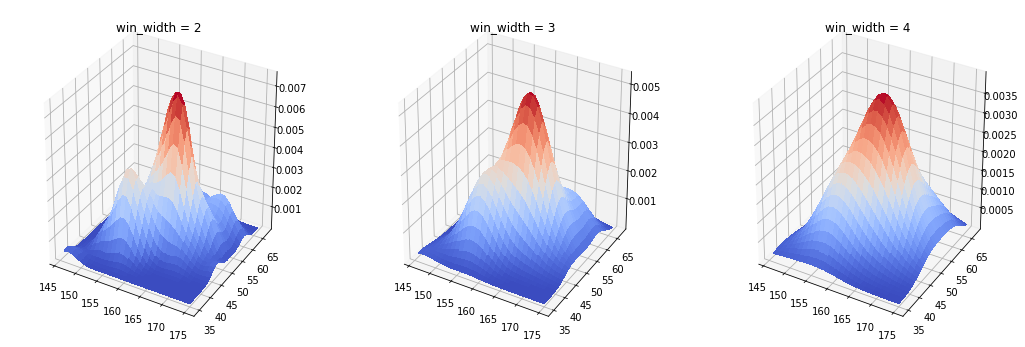

In [59]:
from playML.parzen import parzen_estimation
pg1 = parzen_estimation(x_2Dgauss, 2, mode='gauss')
pg2 = parzen_estimation(x_2Dgauss, 3, mode='gauss')
pg3 = parzen_estimation(x_2Dgauss, 4, mode='gauss')

from playML.utils import make_meshgrid
x, y = make_meshgrid(X_train[y_train==1, 0], X_train[y_train==1, 1], h=1)

zg, zh, zt = [] , [], []
for i, j in zip(x.ravel(), y.ravel()): 
    zg.append(pg1([[i, j]])) 
    zh.append(pg2([[i, j]])) 
    zt.append(pg3([[i, j]]))

zg，zh，zt = np.asarray(zg).reshape(x.shape), np.asarray(zh).reshape(x.shape), np.asarray(zt).reshape(x.shape)

fig = plt.figure(figsize=(18, 6)) 
ax1 = fig.add_subplot(131, projection='3d') 
surf = ax1.plot_surface(x, y, zg, rstride=1, cstride=1, cmap=cm.coolwarm, antialiased=False)
ax1.set_title("win_width = 2")
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(x, y, zh, rstride=1, cstride=1, cmap=cm.coolwarm, antialiased=False)
ax2.set_title("win_width = 3") 
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_surface(x, y, zt, rstride=1, cstride=1, cmap=cm.coolwarm, antialiased=False)
ax3.set_title("win_width = 4")